In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helper_functions import *

## Part One
#### Approximating the linear vector field

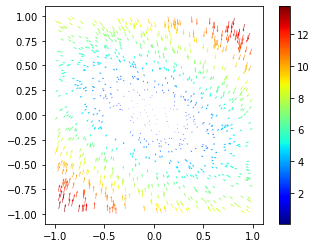

In [2]:
x0 = np.loadtxt('data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('data/linear_vectorfield_data_x1.txt')

dt = 0.01
v = (x1 - x0)/dt
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], np.linalg.norm(v,axis=1),cmap='jet')
plt.gca().set_aspect('equal')
plt.colorbar()

In [6]:
X, Y = np.meshgrid(np.arange(-10,10, .2), np.arange(-10,10,.2))
XY = np.array([X.flatten(), Y.flatten()]).T
U, V = [W.reshape(X.shape) for W in v.T]
plt.streamplot(X, Y, U, V)
plt.gca().set_aspect('equal')

ValueError: cannot reshape array of size 1000 into shape (100,100)

#### Approximating the matrix $A \in \mathbb{R}^{2x2}$

In [7]:
# Approximating the A matrix using numpy.linalg.lstsq
coeff = ret_coeff(x0, v)
A_T = coeff[0:2,0:2]
A = A_T.T
print(A)

[[-4.9355245   2.31911527]
 [-4.63823204 -9.57375731]]


In [8]:
# Using Explicit formula to estimate the coefficient matrix.
'''
A_1 = np.matmul((x0.T),x0);
A_2 = np.linalg.inv(A_1)
A_3 = np.matmul(A_2,x0.T)
A_T = np.matmul(A_3,v)
A = A_T.T

print(A)
'''

'\nA_1 = np.matmul((x0.T),x0);\nA_2 = np.linalg.inv(A_1)\nA_3 = np.matmul(A_2,x0.T)\nA_T = np.matmul(A_3,v)\nA = A_T.T\n\nprint(A)\n'

## Part Two
#### Estimating value of $x_1^{(k)}$ by solving $\dot{x} =\hat{A}x $

In [9]:
x = x0
T_end = 0.1
t = 0
while t < T_end:
    x_dot = x@A
    x += x_dot*dt
    t += dt
x1hat = x
# Estimating the mean squared error
MSE(x1hat, x1)

0.2135637399902036

## Part Three
#### Solving equation with initial point as (10,10)

In [10]:
x = [10, 10]
T_end = 100
t = 0
#x_list = np.empty
x_list = [[10,10]]
#x_dot_list = [0]
while t < T_end:
    x_dot = x@A
    #print(x)
    x += x_dot*dt
    t += dt
    x_list.append(list(x))
    #x_dot_list.append(x_dot)
print(x_list)

[[10, 10], [9.04262434666712, 9.274535796703951], [8.166148916321323, 8.596323130574179], [7.364389222704574, 7.962714423546595], [6.631588817207057, 7.3711721448900445], [5.9623930587135465, 6.819268202228211], [5.351824206291241, 6.304682782556105], [4.795257794940447, 5.825202726585531], [4.288400252727498, 5.378719510853216], [3.8272677162240667, 4.963226903932502], [3.408166000226007, 4.576818355739274], [3.02767167716167, 4.217684172254086], [2.6826142213736075, 3.884108521939201], [2.370059173522945, 3.574466314659314], [2.087292280681602, 3.287219988969954], [1.8318045682071675, 3.020916239173559], [1.6012783002057744, 2.7741827095188256], [1.39357378625048, 2.5457246792963426], [1.2067169930102448, 2.3343217593277124], [1.0388879205344996, 2.1388246174241825], [0.8884097041098608, 1.9581517477745625], [0.7537384038406625, 1.7912862968835923], [0.6334534453875863, 1.637272956595874], [0.5262486766147365, 1.4952149328838582], [0.4309240062327369, 1.3642709974300518], [0.34637759

In [11]:
#Plotting the trajectory

Text(0.5, 1.0, '$x_0 = (10,10)$; $\\dot{x} =\\hat{A}x $')

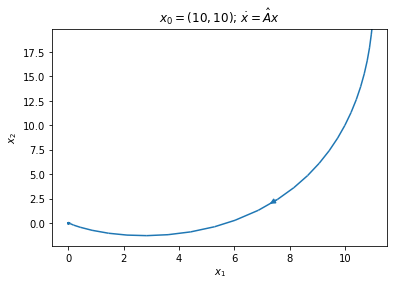

In [14]:
# Plotting the Phase portrait
xmin=-20
xmax=20
ymin=-20
ymax=20
X, Y = np.meshgrid(np.arange(xmin,xmax, 0.1), np.arange(ymin,ymax,0.1))
XY = np.array([X.flatten(), Y.flatten()])
AXY = np.matmul(A, XY)
U = AXY[0].reshape(X.shape)
V = AXY[1].reshape(Y.shape)
plt.figure()
plt.streamplot(X, Y, U, V,start_points=[(10,10)])
#plt.scatter(x_list[0],x_list[1],c='red')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'$x_0 = (10,10)$; $\dot{x} =\hat{A}x $')